# Chocolate Sales Revenue Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('D:/DS Bootcamp/Machine Learning/machine learning projects/Machine-Learning-Projects/Predicting Chocolate Sales Revenue/Chocolate Sales.csv')
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


--------

## Data Summary

We have 6 columns in our dataset:
- 'Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped'

=========================================================================

- Total no of unique values Sales Person: 25
- Total no of unique values Country: 6
- Total no of unique values Product: 22
- Total no of unique values Date: 168
- Total no of unique values Amount: 827
- Total no of unique values Boxes Shipped: 385
- Total no of unique values Year: 1
- Total no of unique values Month: 8
- Total no of unique values Day: 31

=========================================================================

- Sales Person:['Jehu Rudeforth' 'Van Tuxwell' 'Gigi Bohling' 'Jan Morforth' 'Oby Sorrel'
 'Gunar Cockshoot' 'Brien Boise' 'Rafaelita Blaksland' 'Barr Faughny'
 'Mallorie Waber' 'Karlen McCaffrey' "Marney O'Breen" 'Beverie Moffet'
 'Roddy Speechley' 'Curtice Advani' 'Husein Augar' 'Kaine Padly'
 'Dennison Crosswaite' "Wilone O'Kielt" 'Andria Kimpton' 'Kelci Walkden'
 'Camilla Castle' 'Madelene Upcott' 'Dotty Strutley' 'Ches Bonnell']

- Country:['UK' 'India' 'Australia' 'New Zealand' 'USA' 'Canada']

- Product:['Mint Chip Choco' '85% Dark Bars' 'Peanut Butter Cubes'
 'Smooth Sliky Salty' '99% Dark & Pure' 'After Nines' '50% Dark Bites'
 'Orange Choco' 'Eclairs' 'Drinking Coco' 'Organic Choco Syrup'
 'Milk Bars' 'Spicy Special Slims' 'Fruit & Nut Bars' 'White Choc'
 'Manuka Honey Choco' 'Almond Choco' 'Raspberry Choco'
 'Choco Coated Almonds' "Baker's Choco Chips" 'Caramel Stuffed Bars'
 '70% Dark Bites']

----------

## Data Anomilies Handling

**Remove `$` and `,` from amount column and change the data type to int** 

In [4]:
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(int)

In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

---------

## Handling Missing Values

In [6]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

**No missing values**

----------

## Handling Duplicates

In [7]:
df.duplicated().sum()

0

**No duplicates**

---------

## Handling Outliers

In [8]:
num = ['Amount', 'Boxes Shipped']

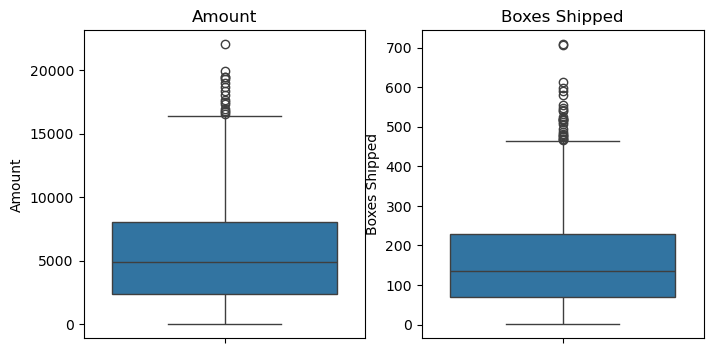

In [9]:
plt.figure(figsize=(8, 4))

for i, col in enumerate(num):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.show()

**These are not outliers**

----------

## Exploratory Data Analysis

### Univariate Analysis

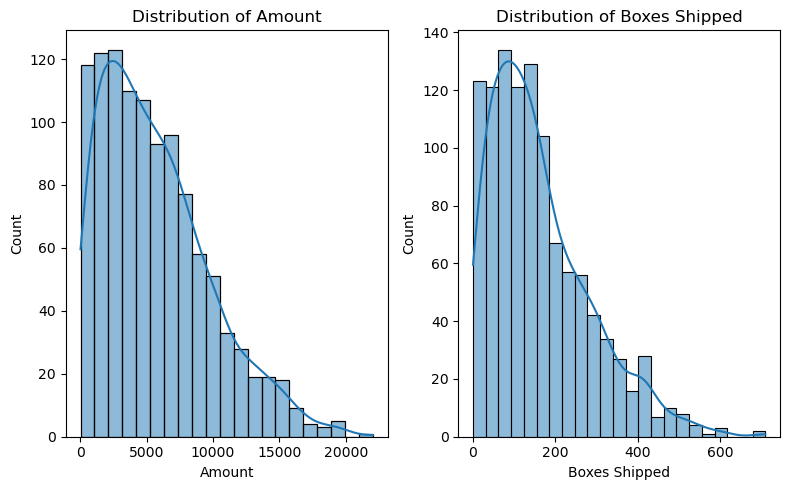

In [10]:
plt.figure(figsize=(8, 5))
for i, col in enumerate(num):
    plt.subplot(1, len(num), i + 1)
    sns.histplot(data=df, x=col, kde=True, palette='viridis')
    plt.title(f'Distribution of {col}')

plt.tight_layout()  
plt.show()

**Both have right skewed distribution**

In [11]:
cat = ['Sales Person', 'Country', 'Product']

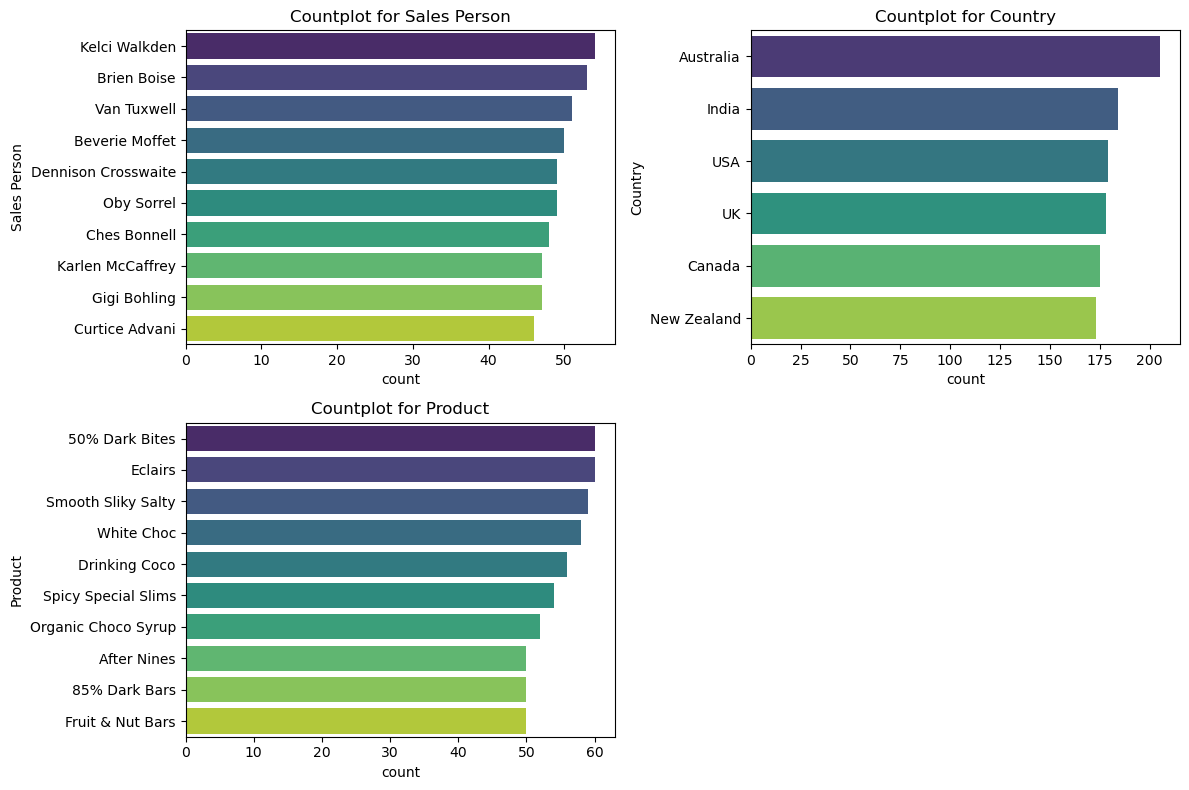

In [12]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cat):
    plt.subplot(2, 2, i + 1)

    top_10 = df[col].value_counts().head(10)
    sns.countplot(y=col, data=df[df[col].isin(top_10.index)], order=top_10.index, palette='viridis')
    plt.title(f'Countplot for {col}')
    
plt.tight_layout()
plt.show()

- Kelci Walkden to Dennison Crosswaite these are the top 5 Sales Person
- Australia, India leading the most delivery 
- 50% Dark Bites, Eclairs, Silky Salty, White Choco these products are most sold

---------

### Bivariate Analysis

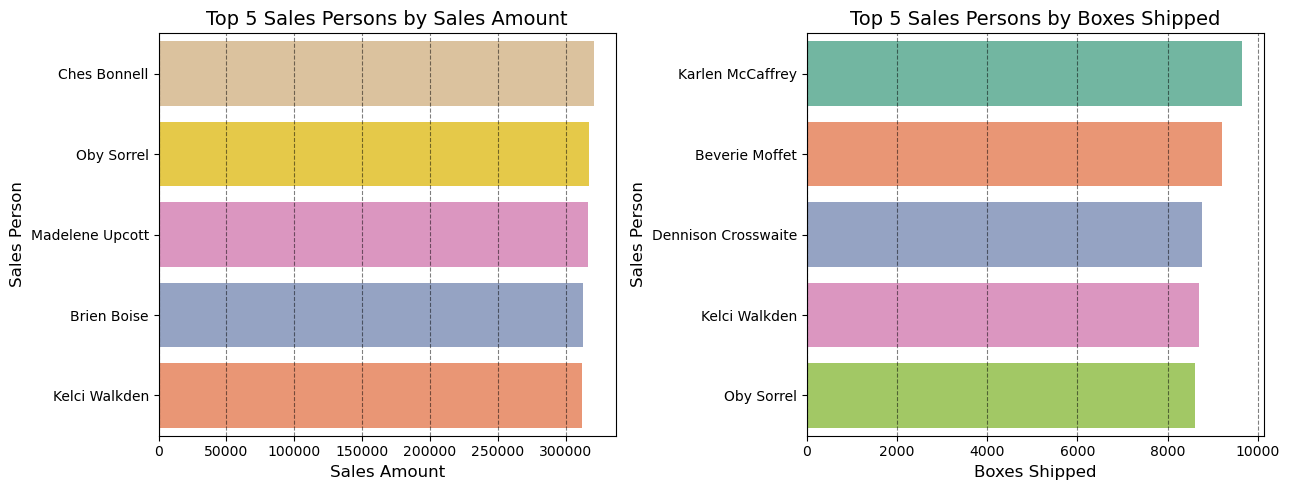

In [13]:
sale_by_person = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(5).reset_index()
salesperson_boxship = df.groupby('Sales Person')['Boxes Shipped'].sum().sort_values(ascending=False).head(5).reset_index()

fig, axs = plt.subplots(1, 2, figsize=(13, 5)) 

sns.barplot(y='Sales Person', x='Amount', data=sale_by_person,
            orient='h', palette='Set2_r', ax=axs[0])
axs[0].set_title('Top 5 Sales Persons by Sales Amount', fontsize=14)
axs[0].set_xlabel('Sales Amount', fontsize=12)
axs[0].set_ylabel('Sales Person', fontsize=12)
axs[0].grid(axis='x', linestyle='--', color='black', alpha=0.5)

sns.barplot(y='Sales Person', x='Boxes Shipped', data=salesperson_boxship,
            palette='Set2', ax=axs[1])
axs[1].set_title('Top 5 Sales Persons by Boxes Shipped', fontsize=14)
axs[1].set_xlabel('Boxes Shipped', fontsize=12)
axs[1].set_ylabel('Sales Person', fontsize=12)
axs[1].grid(axis='x', linestyle='--', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

- **Ches Bonnell, Oby Sorrel, Madelene Upcott, Brien Boise, Kelci Walkden these top 5 Sales Person generated the top revenue**
- **Karlen MacCaffrey, Beverie Moffet, Dennison Crosswaite, Kelci Walkden, and Oby Sorrel lead in shipping performance, handling the highest number of boxes among all sales staff**

--------

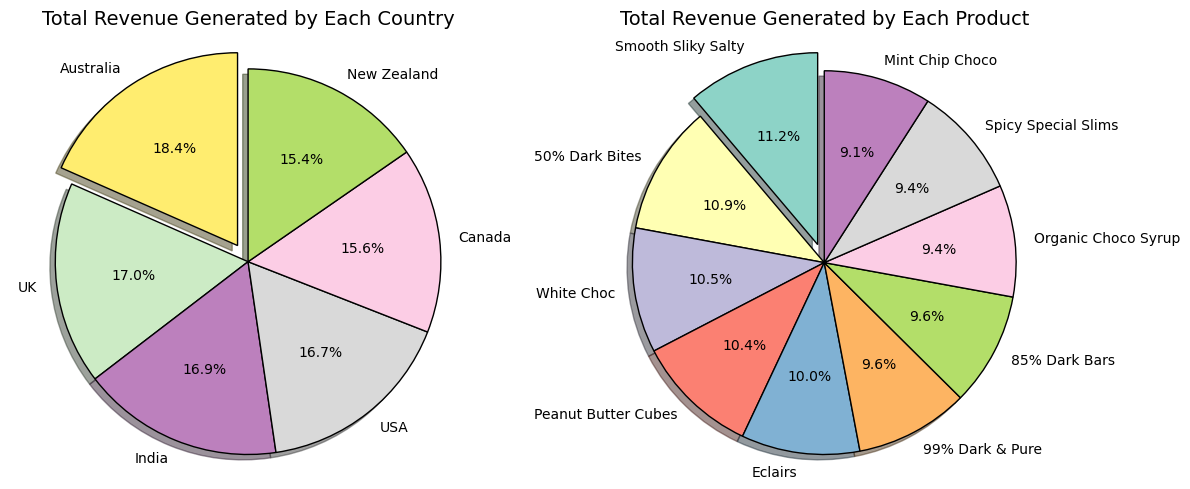

In [14]:
country_revenue = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
product_amount = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)

explode1 = [0.1 if i == 0 else 0 for i in range(len(country_revenue))]
explode2 = [0.1 if i == 0 else 0 for i in range(len(product_amount))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.pie(x=country_revenue, labels=country_revenue.index, autopct='%1.1f%%',
        colors=plt.cm.Set3_r.colors, explode=explode1, shadow=True, startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
ax1.set_title('Total Revenue Generated by Each Country', fontsize=14)
ax1.axis('equal')

ax2.pie(x=product_amount, labels=product_amount.index, autopct='%1.1f%%',
        colors=plt.cm.Set3.colors, explode=explode2, shadow=True, startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
ax2.set_title('Total Revenue Generated by Each Product', fontsize=14)
ax2.axis('equal')

plt.tight_layout()
plt.show()

- **Australia is the top-performing market, generating 18.4% of total revenue, closely followed by the UK at 17%**
- **Among products, "Smooth Silky Salty" emerged as the highest revenue contributor with an 11.2% share**

---------

**Boxes Shipped by Product**

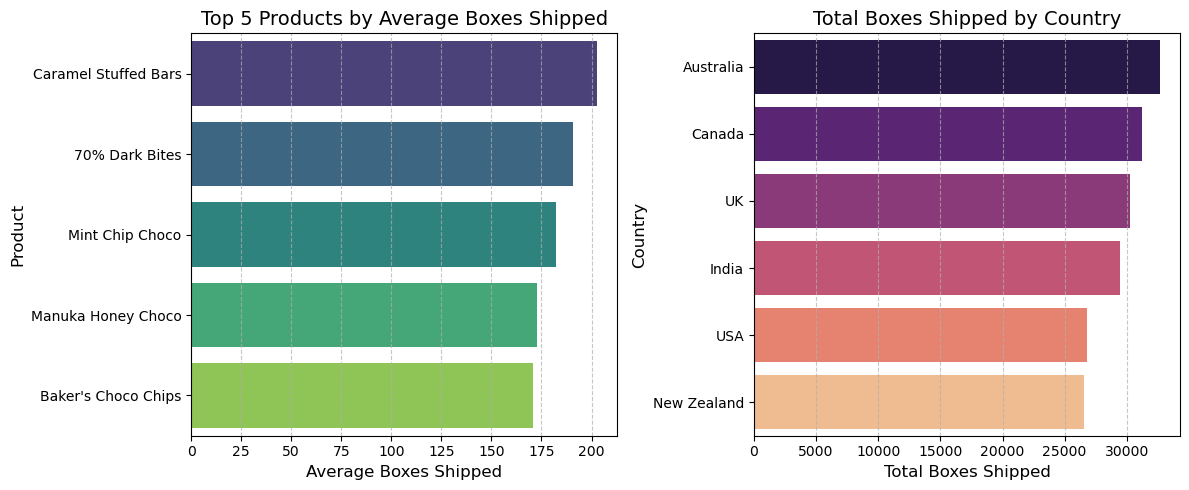

In [15]:
boxship_by_product = df.groupby('Product')['Boxes Shipped'].mean().sort_values(ascending=False).reset_index().head(5)
boxshipped_country = df.groupby('Country')['Boxes Shipped'].sum().sort_values(ascending=False).reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.barplot(y='Product', x='Boxes Shipped', data=boxship_by_product, palette='viridis', ax=axes[0])
axes[0].set_title('Top 5 Products by Average Boxes Shipped', fontsize=14)
axes[0].set_xlabel('Average Boxes Shipped', fontsize=12)
axes[0].set_ylabel('Product', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

sns.barplot(x='Boxes Shipped', y='Country', data=boxshipped_country, palette='magma', ax=axes[1])
axes[1].set_title('Total Boxes Shipped by Country', fontsize=14)
axes[1].set_xlabel('Total Boxes Shipped', fontsize=12)
axes[1].set_ylabel('Country', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **The products Caramel Stuffed Bars, 70% Dark Bites, and Mint Chip Choco show a high shipping demand, each averaging over 175 boxes shipped per order**
- **Australia has the highest shipping demand**

--------

In [16]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_Name'] = df['Date'].dt.day_name()

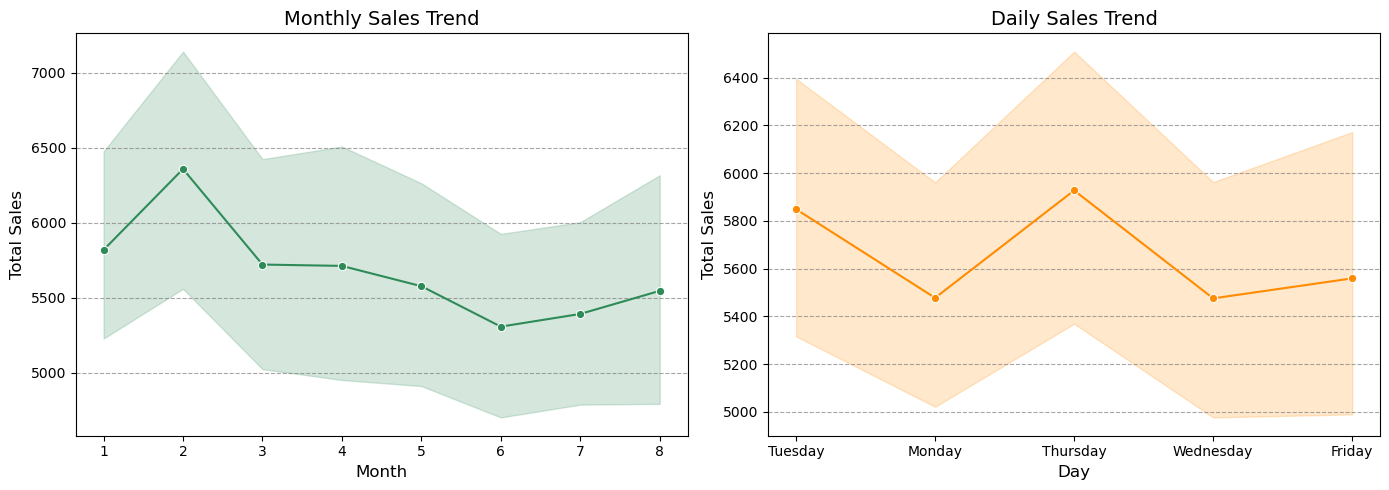

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(x='Month', y='Amount', data=df, 
             ax=axs[0], color='seagreen', marker='o')
axs[0].set_title('Monthly Sales Trend', fontsize=14)
axs[0].set_xlabel('Month', fontsize=12)
axs[0].set_ylabel('Total Sales', fontsize=12)
axs[0].grid(axis='y', linestyle='--', color='gray', alpha=0.7)

sns.lineplot(x='Day_Name', y='Amount', data=df, 
             ax=axs[1], color='darkorange', marker='o')
axs[1].set_title('Daily Sales Trend', fontsize=14)
axs[1].set_xlabel('Day', fontsize=12)
axs[1].set_ylabel('Total Sales', fontsize=12)
axs[1].grid(axis='y', linestyle='--', color='gray', alpha=0.7)

plt.tight_layout()
plt.show()

- **Sales in January and February are notably higher than in the following months, with a decreasing trend observed**
- **Sales are highest on Tuesdays and Thursdays, while other days show relatively lower sales**
- **Saturdays and Sundays appear to be off days**

---------

### Multivariate Analysis

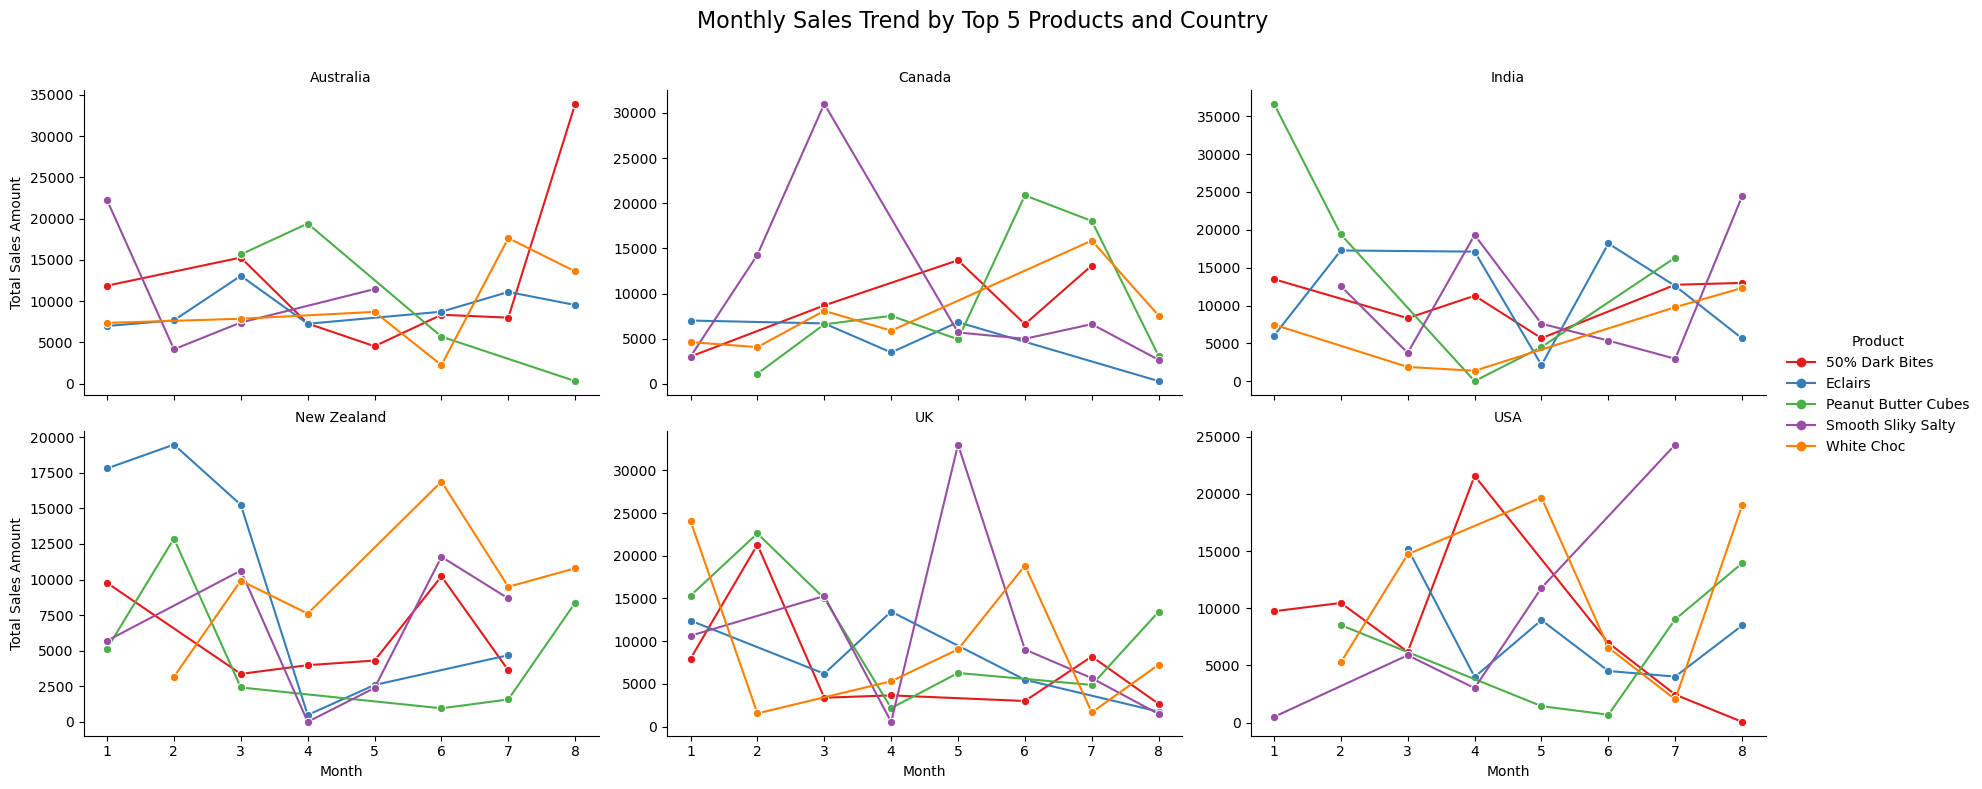

In [18]:
top_5_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(5).index
df_top_products = df[df['Product'].isin(top_5_products)]
monthly_sales = df_top_products.groupby(['Month', 'Product', 'Country'])['Amount'].sum().reset_index()

g = sns.relplot(data=monthly_sales,x='Month',y='Amount',kind='line',hue='Product',col='Country',
                col_wrap=3,marker='o',facet_kws={'sharey': False},palette='Set1',height=4,aspect=1.5)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Month", "Total Sales Amount")
g.fig.suptitle("Monthly Sales Trend by Top 5 Products and Country", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

**Smooth Silky Salty**
- Popular in Canada, UK, and USA, especially in months 3, 5, and 8.
- Sales vary greatly across regions — possibly campaign-driven.

**Peanut Butter Cubes**
- Very strong start in India, but not consistent.
- Performed decently in UK and Canada mid-year.

**White Choco**
- Steady in New Zealand, erratic in others — maybe a niche audience.

**Eclairs**
- Best in New Zealand and India, showing early-month demand.

**50% Dark Bites**
- Strong month 8 in Australia, good mid-year in USA and UK.

-------

In [19]:
numeric_cols = ['Amount', 'Boxes Shipped', 'Month']

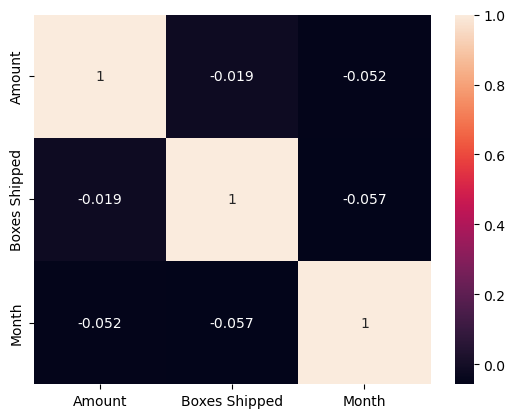

In [20]:
sns.heatmap(df[numeric_cols].corr(), annot=True)
plt.show()


- **Not a strong correlation between Amount and Boxes Shipped**

--------

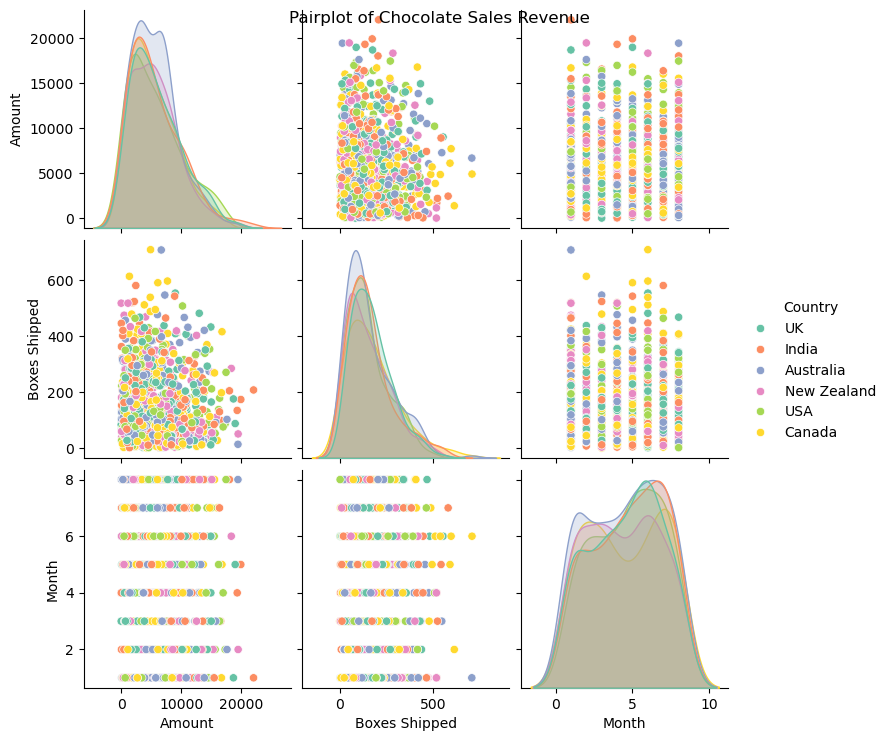

In [21]:
sns.pairplot(df[numeric_cols + ['Country']], hue='Country', kind='scatter', 
             diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Chocolate Sales Revenue')
plt.show()

------

### Business Insights 

**Which salesperson should the chocolate company recognize as the top performer**

In [22]:
top_performer = df.groupby('Sales Person').agg(Total_Revenue=('Amount', 'sum'),
                                               Total_Boxes_Shipped=('Boxes Shipped', 'sum'))
top_performer.reset_index(inplace=True)

top_performer['Total_Performence'] = top_performer['Total_Revenue'] + top_performer['Total_Boxes_Shipped']
top_performer.sort_values(by='Total_Performence', ascending=False, inplace=True)

print(f'The Top Performer Sales Person based on Total Revenue and Total Boxes Shipped is: {top_performer["Sales Person"].values[0]}')

The Top Performer Sales Person based on Total Revenue and Total Boxes Shipped is: Ches Bonnell


-----

**Which country should the company focus on for expanding its chocolate sales**
- New Zealand stands out as a country with relatively low revenue generation and fewer boxes shipped compared to other regions. This indicates that the company’s current market penetration in New Zealand is limited, which presents a potential opportunity for growth.

-------

**What insights can you provide about the popularity of chocolate products (e.g., 50% Dark 
Bites vs. Eclairs)? How can the company use this to adjust its production or marketing 
strategy?**

**Insights**
- 50% Dark Bites consistently appear at the top in terms of average boxes shipped, it signals strong consumer preference. 
- On the other hand, “Eclairs” are lower in the list, it may indicate lower demand or the need for better promotion.

**Recommendations for Production or Marketing Strategy**

**For Popular Products**
- Ensure supply meets demand to avoid stockouts.
- Feature top-selling items more prominently in campaigns.
- Make sure these products are widely available in high-performing countries.
  
**For Low Performing Products**
- Try limited-time offers, bundling, or in-store tastings to boost visibility and trial.
- Consider alternative marketing strategies, such as influencer partnerships or social media campaigns.
- Evaluate the potential of new product launches or product diversification to address the low-performing product's niche.

--------

**Are there seasonal patterns in chocolate sales (e.g., higher sales in certain months)**
- January and February emerge as the highest-performing months in terms of total boxes shipped and revenue generated. This pattern suggests a spike in consumer demand during the New Year and Valentine’s Day season, when gifting chocolates is especially popular.

**How the Business Can Use This Insight for Inventory Planning**

**Seasonal Demand Strategy**
- Increase Inventory in Q1: Stock up in advance for January and February to meet heightened demand and avoid missed sales due to stockouts.
- Plan manufacturing and logistics cycles accordingly, ensuring top-selling products are available in sufficient quantity before peak months.

**Marketing and Promotions**
- Launch targeted marketing campaigns around New Year and Valentine’s Day to maximize engagement.
- Offer promotions and discounts to incentivize purchases during the holiday season.
Bundle popular products or create seasonal gift packs for higher appeal.

---------

**If the company wants to increase revenue by 20%, how many additional boxes of 
chocolate would need to be shipped, assuming the current average revenue per box 
remains constant**

In [23]:
total_revenue = df['Amount'].sum()
total_boxes = df['Boxes Shipped'].sum()
avg_revenue_per_box = total_revenue / total_boxes
target_revenue = total_revenue * 1.20
additional_revenue = target_revenue - total_revenue
additional_boxes_needed = additional_revenue / avg_revenue_per_box

print(f'Total Revenue: ${total_revenue:.2f}')
print(f'Total Boxes Shipped: {total_boxes}')
print('======================================')
print(f'Average Revenue per Box: ${avg_revenue_per_box:.2f}')
print(f'Target Revenue: ${target_revenue:.2f}')
print('======================================')
print(f'Additional Revenue Needed: ${additional_revenue:.2f}')
print(f'Additional Boxes Needed: {additional_boxes_needed:.2f}')


Total Revenue: $6183625.00
Total Boxes Shipped: 177007
Average Revenue per Box: $34.93
Target Revenue: $7420350.00
Additional Revenue Needed: $1236725.00
Additional Boxes Needed: 35401.40


**Additional Boxes of chocolate needed to be shipped are 35k**

----------

## Feature Engineering

**"High" revenue (e.g. Amount > median.) or "Low" revenue (e.g., Amount ≤ median)**
- 1 = High revenue
- 0 = Low revenue

In [24]:
threshold = df['Amount'].median()
df['target'] = df['Amount'].apply(lambda x: 1 if x > threshold else 0)

Remove Date, Year and Day_name, cuz it not helpfull for prediction

In [25]:
df.drop(columns=['Sales Person','Date','Year','Day_Name'], inplace=True)

Now encode the categorical variables.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Lets make a pipeline for encoding categorical features, so we can use the same pipeline for every model 
- No ordered in data we use onehotencoding
- Scale the numerical features 

In [27]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Country', 'Product']),
    ('num', StandardScaler(), ['Amount', 'Boxes Shipped'])
], remainder='passthrough')

## Model Training

**Import Models, Metrics**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

**Train test Split**

In [29]:
X = df.drop(columns=['target'])
y = df['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**KNN Classifier**

**After doing grid search i found the best parameters to use for the KNN algorithm.**


- Best Parameters: {'classifier__n_neighbors': 14}
- Best CV Score (Accuracy): 0.9268571428571428

In [30]:
Knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=14))
])

**Fit on training data**

In [31]:
Knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'Product']),
                                                 ('num', StandardScaler(),
                                                  ['Amount',
                                                   'Boxes Shipped'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=14))])

**Predict on both train and test data**

In [32]:
y_train_predknn = Knn.predict(X_train)
y_test_predknn = Knn.predict(X_test)

**Model Evaluation**

In [33]:
print(f'The accuracy score of Knn training data is {accuracy_score(y_train, y_train_predknn)}')
print(f'The accuracy score of Knn testing data is {accuracy_score(y_test, y_test_predknn)}')

print('\nConfusion matrix for Knn training data is: ')
print(f' {confusion_matrix(y_train, y_train_predknn)}')
print('Confusion matrix for Knn testing data is: ')
print(f'{confusion_matrix(y_test, y_test_predknn)}')

print('\nClassification report for Knn training data is: ')
print(f'{classification_report(y_train, y_train_predknn)}')
print('Classification report for Knn testing data is: ')
print(f'{classification_report(y_test, y_test_predknn)}')


The accuracy score of Knn training data is 0.9428571428571428
The accuracy score of Knn testing data is 0.9041095890410958

Confusion matrix for Knn training data is: 
 [[434   7]
 [ 43 391]]
Confusion matrix for Knn testing data is: 
[[100   6]
 [ 15  98]]

Classification report for Knn training data is: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       441
           1       0.98      0.90      0.94       434

    accuracy                           0.94       875
   macro avg       0.95      0.94      0.94       875
weighted avg       0.95      0.94      0.94       875

Classification report for Knn testing data is: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       106
           1       0.94      0.87      0.90       113

    accuracy                           0.90       219
   macro avg       0.91      0.91      0.90       219
weighted avg       0.91      0.90      0.90  

**KNN Model Summary**

**Best Hyperparameters**
- n_neighbors = 14

**Training Accuracy: 94.29%**
- That’s actually a good sign because it means that the model is not overfitting

**Testing Accuracy: 90.41%**
- Anything >90% in a real-world scenario is often more than acceptable

**Confusion Matrix (Test)**
- 6 False poitives
- 15 False negatives





----------

**Decision Tree Classifier**

In [34]:
dtc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=2))
])

**Fit on Training Data**

In [35]:
dtc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'Product']),
                                                 ('num', StandardScaler(),
                                                  ['Amount',
                                                   'Boxes Shipped'])])),
                ('classifier', DecisionTreeClassifier(max_depth=2))])

**Predict on both train and test**

In [36]:
y_train_preddtc = dtc.predict(X_train)
y_test_preddtc = dtc.predict(X_test)

**Model Evaluation**

In [37]:
print(f'The accuracy score of dtc training data is {accuracy_score(y_train, y_train_preddtc)}')
print(f'The accuracy score of dtc testing data is {accuracy_score(y_test, y_test_preddtc)}')

print('\nConfusion matrix for dtc training data is: ')
print(f' {confusion_matrix(y_train, y_train_preddtc)}')
print('Confusion matrix for dtc testing data is: ')
print(f'{confusion_matrix(y_test, y_test_preddtc)}')
print('\nClassification report for dtc training data is: ')
print(f'{classification_report(y_train, y_train_preddtc)}')
print('Classification report for dtc testing data is: ')
print(f'{classification_report(y_test, y_test_preddtc)}')

The accuracy score of dtc training data is 1.0
The accuracy score of dtc testing data is 0.9954337899543378

Confusion matrix for dtc training data is: 
 [[441   0]
 [  0 434]]
Confusion matrix for dtc testing data is: 
[[106   0]
 [  1 112]]

Classification report for dtc training data is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       441
           1       1.00      1.00      1.00       434

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875

Classification report for dtc testing data is: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       106
           1       1.00      0.99      1.00       113

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



**DTC Model Summary**

**Training accuracy: 1**
- Model is try to reach on all the data points, its slightly overfit, but it is not bcz the test accuracy is also same.

**Testing accuracy: 0.995**
- Great accuracy score, no overfitting.

**Classification Report**
- Class 0: Precision 0.99, Recall 1.00, F1 1.00
- Class 1: Precision 1.00, Recall 0.99, F1 1.00
- Only one missclassified on test 

------------

**Logistic Regression**

**After doing Grid seach CV**
- (liblinear is best for binary classification)
- Best Parameters: {'classifier__max_iter': 15, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
- Best Score: 0.9931428571428571
- Test Score: 0.9908675799086758

In [38]:
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=15, penalty='l1', solver='liblinear'))
])

**Fit on traning data**

In [39]:
lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'Product']),
                                                 ('num', StandardScaler(),
                                                  ['Amount',
                                                   'Boxes Shipped'])])),
                ('classifier',
                 LogisticRegression(max_iter=15, penalty='l1',
                                    solver='liblinear'))])

**Predict on both the training and test**

In [40]:
y_train_predlr = lr.predict(X_train)
y_test_predlr = lr.predict(X_test)

**Model Evaluation**

In [41]:
print(f'The accuracy score of Lr training data is {accuracy_score(y_train, y_train_predlr)}')
print(f'The accuracy score of Lr testing data is {accuracy_score(y_test, y_test_predlr)}')

print('\nConfusion matrix for Lr training data is: ')
print(f' {confusion_matrix(y_train, y_train_predlr)}')
print('Confusion matrix for Lr testing data is: ')
print(f'{confusion_matrix(y_test, y_test_predlr)}')
print('\nClassification report for Lr training data is: ')
print(f'{classification_report(y_train, y_train_predlr)}')
print('Classification report for Lr testing data is: ')
print(f'{classification_report(y_test, y_test_predlr)}')

The accuracy score of Lr training data is 0.9965714285714286
The accuracy score of Lr testing data is 0.9908675799086758

Confusion matrix for Lr training data is: 
 [[441   0]
 [  3 431]]
Confusion matrix for Lr testing data is: 
[[106   0]
 [  2 111]]

Classification report for Lr training data is: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       441
           1       1.00      0.99      1.00       434

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875

Classification report for Lr testing data is: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       106
           1       1.00      0.98      0.99       113

    accuracy                           0.99       219
   macro avg       0.99      0.99      0.99       219
weighted avg       0.99      0.99      0.99       2

**LR Model Summary**

**Traning accuracy: 0.996**
- Great accuracy, with only 3 misclassified data points

**Test accuracy: 0.990**
- Great accuracy, with only 2 misclassified data points

**LR vs DTR**
- Lr performs better than DTR, also DTR doing some overfitting

-----------

**Random Forest Classifier**

In [42]:
rfc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

**Fit on training data**

In [43]:
rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'Product']),
                                                 ('num', StandardScaler(),
                                                  ['Amount',
                                                   'Boxes Shipped'])])),
                ('classifier', RandomForestClassifier())])

**Predict on both train and test data**

In [44]:
y_train_predrfc = rfc.predict(X_train)
y_test_predrfc = rfc.predict(X_test)

**Model Evaluation**

In [45]:
print(f'The accuracy score of rfc training data is {accuracy_score(y_train, y_train_predrfc)}')
print(f'The accuracy score of rfc testing data is {accuracy_score(y_test, y_test_predrfc)}')

print('\nConfusion matrix for rfc training data is: ')
print(f' {confusion_matrix(y_train, y_train_predrfc)}')
print('Confusion matrix for rfc testing data is: ')
print(f'{confusion_matrix(y_test, y_test_predrfc)}')
print('\nClassification report for rfc training data is: ')
print(f'{classification_report(y_train, y_train_predrfc)}')
print('Classification report for rfc testing data is: ')
print(f'{classification_report(y_test, y_test_predrfc)}')

The accuracy score of rfc training data is 1.0
The accuracy score of rfc testing data is 0.9954337899543378

Confusion matrix for rfc training data is: 
 [[441   0]
 [  0 434]]
Confusion matrix for rfc testing data is: 
[[106   0]
 [  1 112]]

Classification report for rfc training data is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       441
           1       1.00      1.00      1.00       434

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875

Classification report for rfc testing data is: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       106
           1       1.00      0.99      1.00       113

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



**RFC Model Summary**

- Great result on both train and test data.
- No misclassified classes
- No overfitting

-----------

**Comparison of LR, RFC, DTC, KNN using Bar chart**

In [58]:
import matplotlib.cm as cm

In [75]:
train_metrics = {'Logistic Regression': [0.996, 1.00, 0.99],
                 'Decision Tree': [1.00, 1.00, 1.00],
                 'Random Forest': [1.00, 1.00, 1.00],
                 'KNN': [0.942, 0.98, 0.90]}

test_metrics = {'Logistic Regression': [0.990, 1.00, 0.98],
                'Decision Tree': [0.995, 1.00, 0.99],
                'Random Forest': [1.0, 1.00, 1.00], 
                'KNN': [0.984, 0.94, 0.87]}

models = list(train_metrics.keys())
x = np.arange(len(models))
width = 0.25

train_values = np.array(list(train_metrics.values()))
test_values = np.array(list(test_metrics.values()))


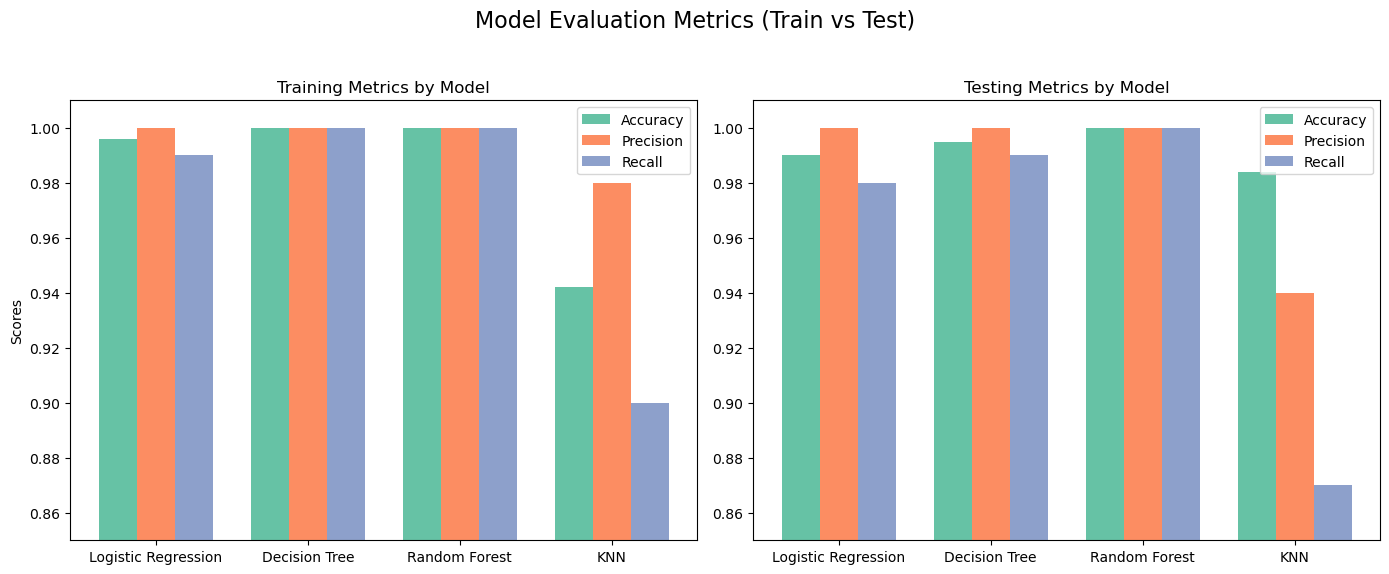

In [76]:
cmap = cm.get_cmap('Set2')  
palette = [cmap(i) for i in range(3)] 

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(x - width, train_values[:, 0], width, label='Accuracy', color=palette[0])
axes[0].bar(x, train_values[:, 1], width, label='Precision', color=palette[1])
axes[0].bar(x + width, train_values[:, 2], width, label='Recall', color=palette[2])
axes[0].set_title('Training Metrics by Model')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_ylabel('Scores')
axes[0].set_ylim(0.85, 1.01)
axes[0].legend()

axes[1].bar(x - width, test_values[:, 0], width, label='Accuracy', color=palette[0])
axes[1].bar(x, test_values[:, 1], width, label='Precision', color=palette[1])
axes[1].bar(x + width, test_values[:, 2], width, label='Recall', color=palette[2])
axes[1].set_title('Testing Metrics by Model')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_ylim(0.85, 1.01)
axes[1].legend()

plt.suptitle('Model Evaluation Metrics (Train vs Test)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Among all the classifiers evaluated, the Random Forest model consistently achieved the highest performance across training and testing sets with near-perfect Accuracy, Precision, and Recall. This suggests it effectively captures the underlying data patterns while maintaining strong generalization ability, making it the most reliable model for this classification task**

---------

# Chocolate Sales Revenue Prediction Report

## Dataset Overview
- **Sales Person:** 25 unique
- **Country:** 6 unique (UK, India, Australia, New Zealand, USA, Canada)
- **Product:** 22 unique
- **Date Range:** 168 unique dates
- **Amount (Revenue):** 827 unique values
- **Boxes Shipped:** 385 unique values

Derived Columns:
- **Year:** 1 (single year of data)
- **Month:** 8 (sales data across 8 months)
- **Day:** 31

---

## Key Insights

### Top Performers
- **Sales Person (Revenue):** Ches Bonnell, Oby Sorrel, Madelene Upcott, Brien Boise, Kelci Walkden
- **Sales Person (Boxes Shipped):** Karlen MacCaffrey, Beverie Moffet, Dennison Crosswaite, Kelci Walkden, Oby Sorrel

### Regional Performance
- **Top Revenue Countries:**
  - Australia: 18.4%
  - UK: 17.0%
- **Highest Shipping Demand:** Australia

- **Opportunity Market:**
  - **New Zealand:** Currently has the lowest revenue and shipping volumes, suggesting a prime opportunity for market expansion.

### Product Trends
- **Top Revenue Generator:** "Smooth Silky Salty" (11.2% of total revenue)
- **High-Demand Products (Shipping):**
  - Caramel Stuffed Bars
  - 70% Dark Bites
  - Mint Chip Choco (each averages 175+ boxes/order)

### Seasonal Patterns
- **Peak Sales Months:** January and February (New Year & Valentine’s Season)
- **Best Sales Days:** Tuesdays and Thursdays
- **Off Days:** Saturdays and Sundays

### Product-Country Highlights
- **Smooth Silky Salty:** Popular in Canada, UK, and USA during months 3, 5, and 8
- **Peanut Butter Cubes:** Strong early sales in India
- **White Choco:** Steady in New Zealand
- **Eclairs:** Strong in New Zealand and India, mostly in early months
- **50% Dark Bites:** Best in Australia (Month 8), strong in mid-year across USA & UK

---

## Business Metrics
- **Total Revenue:** $6,183,625.00
- **Target Revenue:** $7,420,350.00
- **Revenue Shortfall:** $1,236,725.00

- **Total Boxes Shipped:** 177,007
- **Average Revenue per Box:** $34.93
- **Boxes Needed to Meet Target:** 35,401

---

## Recommendations

### Seasonal Demand Strategy
- **Q1 Inventory Buildup:** Stockpile top-performing products ahead of January and February
- **Optimize Logistics:** Align manufacturing and shipment schedules for high-demand months

### Marketing and Promotions
- **New Year & Valentine’s Campaigns:** Utilize emotional appeal and gifting trends
- **Bundling Strategy:** Create holiday-themed packages using top-performing chocolates
- **Promotional Offers:** Discounts, loyalty points, and social media contests to increase volume

### Regional Expansion
- **Focus on New Zealand:**
  - Increase ad spend
  - Establish local partnerships or retail presence
  - Introduce popular products like "Smooth Silky Salty" and "Eclairs"

### Product-Specific Strategy
- **Continue pushing high performers:** Maintain visibility for "Smooth Silky Salty", "Caramel Stuffed Bars", and "50% Dark Bites"
- **Niche Positioning:** Market "White Choco" as a premium product in New Zealand

---

## Machine Learning Model Evaluation
**Classification Goal**
To predict performance classes based on sales-related features

**Model Summary**

**Model	Training Accuracy	Testing Accuracy**
- K-Nearest Neighbors (KNN)	0.943	0.904
- Decision Tree Classifier (DTC)	1.00	0.995
- Logistic Regression (LR)	0.997	0.991
- Random Forest Classifier (RFC)	1.00	0.995

**Best Performing Model: Random Forest**
- Training Accuracy: 1.00
- Testing Accuracy: 0.995
- Precision, Recall, F1: Near-perfect across all metrics
- Excellent Generalization and low overfitting risk

